
# **Lista 06 Processamento Digital de Imagens**
Professora: Mylene Farias

Monitores: André da Costa e Lucas Althoff

Aluno: Igor Lima Rocha Azevedo

Matrícula: 16/0124981

---

## Bibliotecas

In [ ]:
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct

In [ ]:
def displayImage(image1, title1, title2='', image2='', cmap='gray',
                 title3='', image3='', title4='', image4='', figsize=(8, 12)):
    '''Função utilizada para fazer o display da imagem'''
    
    if image2 != '' and image3 != '' and image4 != '':      
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
        ax1.imshow(image1, cmap = cmap)
        ax1.axis('off')
        ax1.set_title(title1)
        
        ax2.imshow(image2, cmap = cmap)
        ax2.axis('off')
        ax2.set_title(title2)
        
        ax3.imshow(image3, cmap = cmap)
        ax3.axis('off')
        ax3.set_title(title3)
        
        ax4.imshow(image4, cmap = cmap)
        ax4.axis('off')
        ax4.set_title(title4)
        
        fig.tight_layout()
    
    elif image2 != '' and image3 != '':      
        fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=figsize)
        ax1.imshow(image1, cmap = cmap)
        ax1.axis('off')
        ax1.set_title(title1)
        
        ax2.imshow(image2, cmap = cmap)
        ax2.axis('off')
        ax2.set_title(title2)
        
        ax3.imshow(image3, cmap = cmap)
        ax3.axis('off')
        ax3.set_title(title3)
        
        fig.tight_layout()
        
    elif image2 != '':      
        fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=figsize)
        ax1.imshow(image1, cmap = cmap)
        ax1.axis('off')
        ax1.set_title(title1)
        
        ax2.imshow(image2, cmap = cmap)
        ax2.axis('off')
        ax2.set_title(title2)
        
        fig.tight_layout()
    else:
        plt.imshow(image1, cmap = cmap)
        plt.title(title1)
        plt.axis('off')
        
    plt.show()

# Problema 1

> **1.1**  Escolha uma imagem de no mínimo 512x512. Leia e visualize a imagem.


> **1.2** Aplique a transformada DCT-2D em a cada um dos blocos 8 × 8 da imagem. Normalize o resultado, dividindo todos os elementos da matriz resultante por 8. Visualize o seu resultado.

> **1.3** O valor do parâmetro *qualidade* ($\small 1 \leq \text{qual}\leq 100 $) controla a escala de quantização na compressão:

$$ \small
\text{escala}_{q} = 
\begin{cases}
    \frac{50}{\text{qual}},& \text{if } \text{qual} \geq 50\\
    2 - \frac{\text{qual}\cdot 2}{100},              & \text{otherwise}.
\end{cases}
$$

> A matriz de quantização é dada por:

$$ \small
            Q = \left[ \begin{array}{llllllll}
                 16&11&10&16&24&40&51&61\\
                 12&12&14&19&26&58&60&55\\
                 14&13&16&24&40&57&69&56\\
                 14&17&22&29&51&87&80&62\\
                18&22&37&56&68&109&103&77\\
                24&35&55&64&81&104&113&92\\
                49&64&78&87&103&121&120&101\\
                72&92&95&98&112&100&103&99
              \end{array} \right].
$$

A matriz de quantizacão modificada para o nível de qualidade desejado pode ser obtida utilizando a seguinte função:

$$\small
 \text{Quant}_T = \max\left(ones(size(Q), \text{round}(\text{escala}_q \cdot Q))\right)
 $$

Escolha um nível de qualidade igual a 50. Divida os elemento de cada um dos blocos 8x8 de coeficientes DCT normalizados pelo elemento correspondente da matriz de quantização, arredondando o resultado para o próximo inteiro. Observe que $\small \text{Quant}_T$ tem 8 linhas e 8 colunas, assim como os blocos de coeficientes DCT. Você acabou de executar um JPEG simplificado.

**1.4** Calcule a entropia da imagem original e da imagem obtida no passo anterior. Qual o resultado? O que você pode concluir deste resultado?

**1.5** Para recuperar a imagem, multiplique cada elemento dos blocos obtidos no item anterior pelo mesmo elemento $\text{Quant}_T$. Em seguida, calcule a IDCT dos blocos 8x8 resultantes e multiplique o seu resultado por 8, obtendo a imagem resultante. Visualize a imagem resultante.

**1.6** Métricas de qualidade podem ser utilizadas para obter o nível de degradação de uma imagem, quando comparada a um original. Mean square error (erro médio quadrático) é um métrica bem simplest da seguinte forma:
$$ \small
MSE = \sum_i^L \sum_j^C{\frac{(I(i,j) - I_r(i,j))^2}{L \cdot C}}
$$
na qual $I_r$ é a imagem resultante $I$ a original (I). Já o peak signal to noise ratio (PSNR), uma métrica bastante popular, pode ser obtido a partir do MSE, utilizando a seuinte equação:
$$ \small
PSNR = 10 \log_{10} \frac{(255)^2}{MSE}.
$$
Finalmente, uma outra métrica popular é a structural similarity index metric (ssim). Calcule o valor do PSNR e do SSIM entre a imagem original e reconstruída. 

> Exemplo do uso das métricas: https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html

**1.7** Repita os itens para:
- 3 outras imagens de conteúdo bem diferentes;
- 10 níveis de qualidade (qual) entre 55 e 100.

Para cada caso, calcule o PSNR e o SSIM  para cada métrica por imagem. De posse destes dados, obtenha para cada imagem um gráfico de PSNR e um gráfico de SSIM, no qual o eixo x corresponde o valor qualidade (qual) e o eixo y possui o valor obtido com a métrica. 

Os resultados de MSE ainda são consistentes? É possível comparar os resultados de PSNR entre as imagens? E os do SSIM? 



### 1.1

Image Height       :  512
Image Width        :  512
Number of Channels :  3
Image Height       :  512
Image Width        :  512


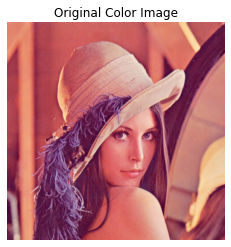

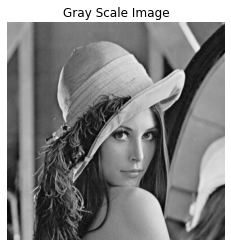

In [ ]:
def read_color_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = img.shape
    
    print('Image Height       : ',height)
    print('Image Width        : ',width)
    print('Number of Channels : ',channels) 
    
    return img


def read_gray_image(img_path):
    img = cv2.imread(img_path)
    try:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    except:
        img_gray = cv2.imread(img_path)
    
    
    height, width = img_gray.shape
    
    print('Image Height       : ',height)
    print('Image Width        : ',width)
    
    return img_gray
    
img_path = './lena.png'
title1 = 'Original Color Image'
image_color = read_color_image(img_path)
title2 = 'Gray Scale Image'
image_gray = read_gray_image(img_path)

displayImage(image_color, title1)
displayImage(image_gray, title2)

### 1.2

160.4375


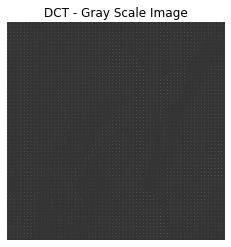

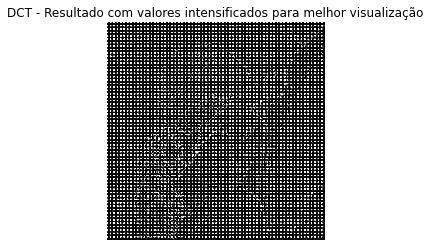

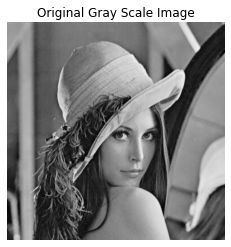

In [ ]:
from scipy import fftpack

def get_2D_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')


def dct_2D(img, n):
    height, width = img.shape
    
    img_out = np.zeros((height, width), dtype=np.float32)
    
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            img_out[i:i+n, j:j+n] = get_2D_dct(img[i:i+n, j:j+n])
    
    #Normalizar o resultado
    img_out = img_out/8
    return img_out


img_dct_2D = dct_2D(image_gray, 8)
print(img_dct_2D[0][0])
title = 'DCT - Gray Scale Image'
displayImage(img_dct_2D, title)


title = 'DCT - Resultado com valores intensificados para melhor visualização'
fig, ((ax1)) = plt.subplots(1, 1)
ax1.imshow(img_dct_2D, cmap='gray', vmin=0, vmax=np.max(img_dct_2D)*0.01)
ax1.axis('off')
ax1.set_title(title)
plt.show()

title = 'Original Gray Scale Image'
displayImage(image_gray, title)


### 1.3

[[ 16.  11.  10.  16.  24.  40.  51.  61.]
 [ 12.  12.  14.  19.  26.  58.  60.  55.]
 [ 14.  13.  16.  24.  40.  57.  69.  56.]
 [ 14.  17.  22.  29.  51.  87.  80.  62.]
 [ 18.  22.  37.  56.  68. 109. 103.  77.]
 [ 24.  35.  55.  64.  81. 104. 113.  92.]
 [ 49.  64.  78.  87. 103. 121. 120. 101.]
 [ 72.  92.  95.  98. 112. 100. 103.  99.]]


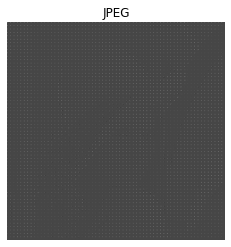

In [ ]:
Q = np.array([[16, 11, 10, 16,  24,  40,  51,  61],
                  [12, 12, 14, 19,  26,  58,  60,  55],
                  [14, 13, 16, 24,  40,  57,  69,  56],
                  [14, 17, 22, 29,  51,  87,  80,  62],
                  [18, 22, 37, 56,  68, 109, 103,  77],
                  [24, 35, 55, 64,  81, 104, 113,  92],
                  [49, 64, 78, 87, 103, 121, 120, 101],
                  [72, 92, 95, 98, 112, 100, 103,  99]])

def quantization_scale(qual):
    if(qual < 50):
        return 50.0/qual
    return 2 - (qual/50.0)

def jpegSimplified(img, qual, N):
    height, width = img.shape

    height_Q, width_Q = Q.shape
    
    quant_scale = quantization_scale(qual)
    Q_ones = np.ones((height_Q, width_Q))
    Q_quant = quant_scale*Q
    quant_T = np.maximum(Q_ones, Q_quant)
    print(quant_T)
    
    img_out = np.zeros((height, width), dtype=float)
    for i in range(int(height/N)):
        for j in range(int(width/N)):
            img_out[i*N:(i+1)*N, j*N:(j+1)*N] = img[i*N:(i+1)*N, j*N:(j+1)*N]/quant_T
    
    
    return img_out
    
img_path = './lena.png'
img_jpeg = jpegSimplified(img_dct_2D, 50, 8)  
cv2.imwrite('./jpeg_resultado.jpeg', img_jpeg)
title = 'JPEG'
displayImage(img_jpeg, title)
    
    

### 1.4

In [ ]:
from scipy.stats   import entropy

print(entropy(entropy(image_gray)))
print(entropy(entropy(img_jpeg)))

6.238311595962928
nan


### 1.5

/Users/igorlimarochaazevedo/Documents/UnB/Processamento Dig. Img./Lista6/venv_lista6/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """
/Users/igorlimarochaazevedo/Documents/UnB/Processamento Dig. Img./Lista6/venv_lista6/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/igorlimarochaazevedo/Documents/UnB/Processamento Dig. Img./Lista6/venv_lista6/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


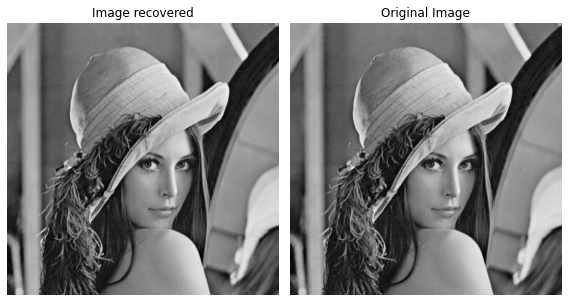

In [ ]:
from scipy.fftpack import ifft, idct

def recoverImage(img, qual, N):
    
    height, width = img.shape

    height_Q, width_Q = Q.shape
    
    quant_scale = quantization_scale(qual)
    Q_ones = np.ones((height_Q, width_Q))
    Q_quant = quant_scale*Q
    quant_T = np.maximum(Q_ones, Q_quant)
    
    img_out = np.zeros((height, width))
    for i in range(int(height/N)):
        for j in range(int(width/N)):
            img_out[i*N:(i+1)*N, j*N:(j+1)*N] = img[i*N:(i+1)*N, j*N:(j+1)*N]*quant_T
            
    return img_out

def get_2D_idct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(img.T, norm='ortho').T, norm='ortho')


def idct_2D(img, n):
    height, width = img.shape
    img_out = np.zeros((height, width), dtype=np.float32)
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            img_out[i:i+n, j:j+n] = get_2D_idct(img[i:i+n, j:j+n])
    img_out = img_out/8
    return img_out


recover = recoverImage(img_jpeg, 50, 8)
recover = idct_2D(recover*8, 8)
title = 'Image recovered'

title2 = 'Original Image'
displayImage(recover, title, title2, image_gray)

Entropia da imagem original e imagem reobtida

In [ ]:
print(entropy(entropy(image_gray)))
print(entropy(entropy(recover)))

6.238311595962928
6.238312


### 1.6

In [ ]:
def calculate_psnr(img1, img2):
    import math
    
    
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))


calculate_psnr(image_gray, recover)

6.8161043600282065

In [ ]:
def calculate_ssim(img1, img2):
    from skimage import data, img_as_float
    from skimage.metrics import structural_similarity as ssim
    
    return ssim(img1, img2,
                  data_range=img2.max() - img2.min())
calculate_ssim(image_gray, recover)

0.06777181907505352

### 1.7

Realizar o mesmo processo para outras imagens

# Problema 2

**2.1** Implemente o algorithmo Lempel-Ziv. O seu algoritmo deve ter como entrada uma imagem (uint8) e como saída a imagem codificada.  

**2.2** Utilizando o algoritmo implementado, comprima as três imagens utilizadas no problema anterior. 

**2.3** Obtenha:
- a entropia de cada uma das três imagens;
- Calcule a razão de compressão para as três imagens codificadas. 

**2.4** Para cada uma das 3 imagens, calcule a imagem diferença, ou seja $\small Id(i,j) = I(i,j) - I(i,j+1)$. Em seguida, calcule a entropia destas imagens diferença. O que pode ser observado? 

**2.5** Utilize o código Lempel-Ziv para comprimir cada uma das imagens diferenças. Calcule novamente a razão de compressão. O que aconeceu? Como você explica estes resultados? 

### 2.1

In [ ]:

def lempel_ziv(img):
    rows = img.shape[0];
    cols = img.shape[1];

    int_string = np.zeros((rows*cols));
    idx = 0;

    #Creating a string of all intensity values

    for i in range(0,rows): 
        for j in range(0,cols):
            int_string[idx] = img[i,j];
            idx = idx+1


    crs = "" ; # currently recognized sequence
    curr = "" ; # current sequence

    output = {}
    out_idx = 0;

    dict_val = {};
    dict_idx = 0;

    for i in range(0,255) :
        dict_val[str(i)] = i;

    #next unused location
    dict_idx = 256;

    curr = int_string[0];

    crs = str(int(curr));

    for i in range(1,idx) :
        curr = int_string[i];

        t_str = crs + "-" + str(int(curr))

        #print("t_str is " + t_str)

        if t_str in dict_val :
            #print(t_str + " Already exists");
            crs = t_str;
        else:
            # if not found in the dictionary

            #print("Creating a new entry for the dictionary ")
            output[out_idx] = dict_val[crs]
            #print("Output " , + output[int(out_idx)])
            out_idx = out_idx + 1;
            crs = str(int(curr));

            # add the new entery to the dictionary
            dict_val[t_str] = dict_idx;
            dict_idx = dict_idx + 1


    #Last entry will always be found in the dictionary
    if crs in dict_val : 
        output[out_idx] = dict_val[crs]
        #print("Output " , + output[int(out_idx)])
        out_idx = out_idx + 1;

    #printing the encoded output
    return output.keys()

print(lempel_ziv(image_gray))

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

1


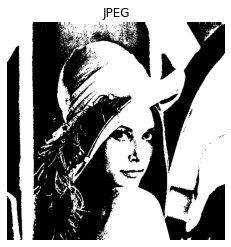

In [ ]:
def binary_image(img):
    ret, bin_image = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    bin_image = bin_image/255
    
    return bin_image

def split(word): 
    return [char for char in word]  

def de2bi(array):
    array.sort(reverse = True)
    max_el = max(array)
    
    bin_arr = split(bin(max_el)[2:])
    bin_arr = np.asarray(bin_arr)
    bin_arr = bin_arr.astype(int)
    max_len = len(bin_arr)
    
    for el in array[1:]:
        res = split(bin(el)[2:])
        res = np.asarray(res)
        res = res.astype(int)
        new_res = np.zeros(max_len - len(res))
        res = np.concatenate((new_res, res), axis=0)
        res = res.astype(int)
        bin_arr = np.vstack((bin_arr, res))
        
    return bin_arr

# def lempel_ziv(bin_image):
#     n_img = bin_image.size
    
#     dictionary = dict()
#     dictionary[1] = 0
#     dictionary[2] = 1
    
#     enc_bits = de2bi([len(dictionary) - 1]).size
#     print(enc_bits)
            
    
bin_image = binary_image(image_gray)
lempel_ziv(bin_image)
title2 = 'Lempel Ziv'
displayImage(bin_image, title)

### 2.2

### 2.3

### 2.4

### 2.5